In [30]:
%matplotlib inline
import PIL
import matplotlib.pyplot as plt
from random import gauss
import pandas as pd
import random
import numpy as np
from scipy import signal
from sklearn import preprocessing

In [31]:
white_noise = [gauss(0.0, 1.0) for i in range(1000)]

In [32]:
white_noise = pd.DataFrame(white_noise)

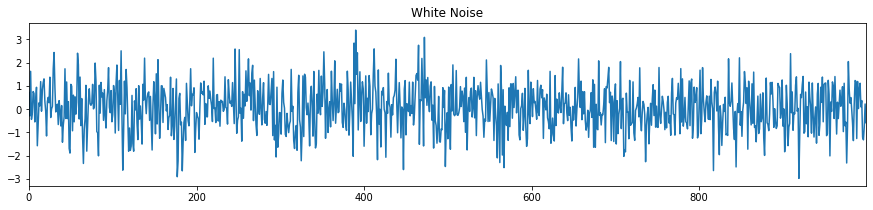

In [33]:
white_noise.plot(figsize=(15,3), title="White Noise", legend=False)
white_noise.to_csv('output\white_noise_complete.csv', index = True)

In [34]:
xlim = 100
x = np.arange(0, xlim, 0.1)
y = np.sin(x)*10
seasonal = pd.DataFrame(y)+white_noise

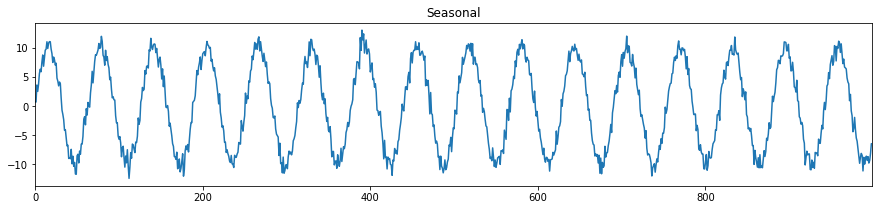

In [35]:
seasonal.plot(figsize=(15,3), title="Seasonal", legend=False)
seasonal.to_csv('output\seasonal_complete.csv', index = True)

In [36]:
xlim = 100
x = np.arange(0, xlim, 0.1)
trend = pd.DataFrame(x)+white_noise

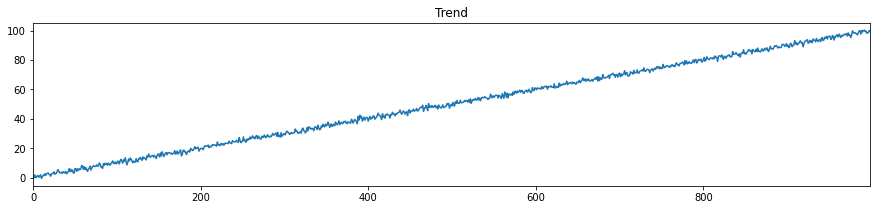

In [37]:
trend.plot(figsize=(15,3), title="Trend", legend=False)
seasonal.to_csv('output\/trend_complete.csv', index = True)

In [38]:
xlim = 100
x = np.arange(0, xlim, 0.1)
y = np.sin(x)*10
seasonal_and_trend = pd.DataFrame(y)+white_noise*3+pd.DataFrame(x)

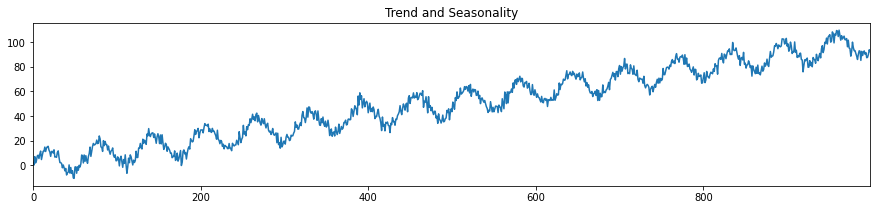

In [39]:
seasonal_and_trend.plot(figsize=(15,3), title="Trend and Seasonality", legend=False);
seasonal_and_trend.to_csv('output\seasonal_and_trend_complete.csv', index = True)

In [40]:
seasonal_scaled = preprocessing.scale(seasonal)
trend_scaled = preprocessing.scale(trend)
seasonal_and_trend_scaled = preprocessing.scale(seasonal_and_trend)
white_noise_scaled = preprocessing.scale(white_noise)

In [41]:
seasonal_scaled_ac = signal.correlate(seasonal_scaled, seasonal_scaled, mode='full')
trend_scaled_ac = signal.correlate(trend_scaled, trend_scaled, mode='full')
seasonal_and_trend_scaled_ac = signal.correlate(seasonal_and_trend_scaled, seasonal_and_trend_scaled, mode='full')
white_noise_scaled_ac = signal.correlate(white_noise_scaled, white_noise_scaled, mode='full')

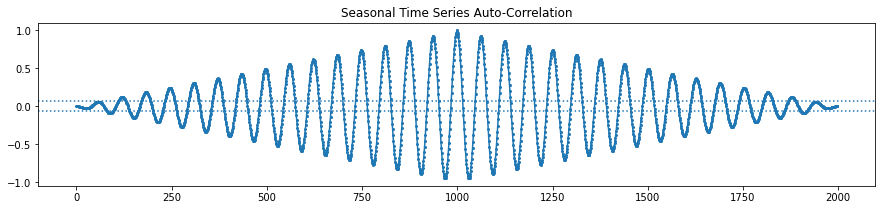

In [42]:
plt.figure(figsize=(15,3))
plt.plot(seasonal_scaled_ac/len(seasonal_scaled), 'o-', markersize=2)
plt.axhline(2/np.sqrt(len(seasonal_scaled)), ls=':')
plt.axhline(-2/np.sqrt(len(seasonal_scaled)), ls=':')
plt.title('Seasonal Time Series Auto-Correlation')
plt.show()

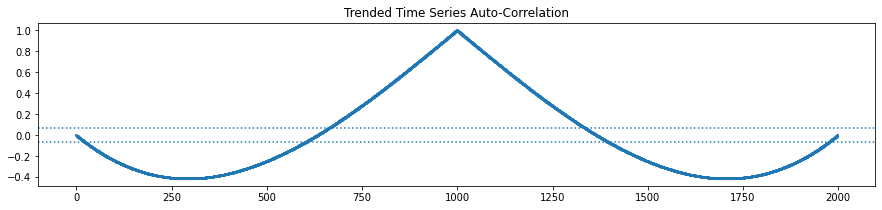

In [43]:
plt.figure(figsize=(15,3))
plt.plot(trend_scaled_ac/len(trend_scaled), 'o-', markersize=2)
plt.axhline(2/np.sqrt(len(trend_scaled)), ls=':')
plt.axhline(-2/np.sqrt(len(trend_scaled)), ls=':')
plt.title('Trended Time Series Auto-Correlation')
plt.show()

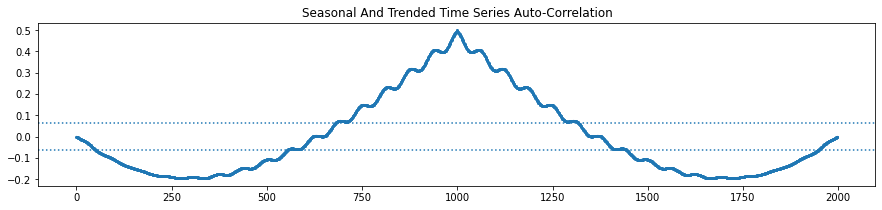

In [44]:
plt.figure(figsize=(15,3))
plt.plot(seasonal_and_trend_scaled_ac/len(seasonal_and_trend_scaled_ac), 'o-', markersize=2)
plt.axhline(2/np.sqrt(len(seasonal_and_trend_scaled)), ls=':')
plt.axhline(-2/np.sqrt(len(seasonal_and_trend_scaled)), ls=':')
plt.title('Seasonal And Trended Time Series Auto-Correlation')
plt.show()

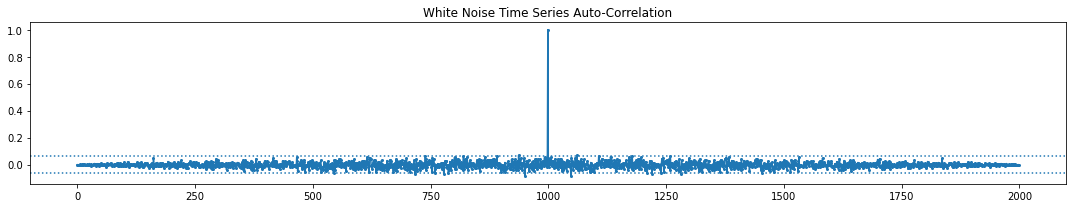

In [45]:
plt.figure(figsize=(15,3))
plt.plot(white_noise_scaled_ac/len(white_noise_scaled), 'o-', markersize=2)
plt.axhline(2/np.sqrt(len(white_noise_scaled)), ls=':')
plt.axhline(-2/np.sqrt(len(white_noise_scaled)), ls=':')
plt.title('White Noise Time Series Auto-Correlation')
plt.tight_layout()
plt.show()